In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [2]:
clients_with = "daily_issda"
clients_without = None #"_hphc_"



df = pd.read_csv("./expes_all.csv")

#batch = "prng"
#expes = list(filter(lambda x: batch in x, df.expe.unique()))
#df = df[df["expe"].isin(expes)]

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))
if clients_without is not None:
    clients = list(filter(lambda x: clients_without not in x, clients))


df = df[(df["wall_time"] == 1000) & (df["clients"].isin(clients))]
df.days_size = df.days_size.astype(int)
df.agg_size = df.agg_size.astype(int)
df = df[df.expe.notnull()]
df["success"] = (df.nsols == 1) & (df.wall_hit == False)
df.success = df.success.astype(int)

df

Unnamed: 0                                 expe          clients  \
42001            0  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
42002            1  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
42003            2  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
42004            3  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
42005            4  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
...            ...                                  ...              ...   
373946         178  ./expes/v2_2020-11-27_di_500-prng-2  daily_issda_500   
373947         179  ./expes/v2_2020-11-27_di_500-prng-2  daily_issda_500   
373948         180  ./expes/v2_2020-11-27_di_500-prng-2  daily_issda_500   
373949         181  ./expes/v2_2020-11-27_di_500-prng-2  daily_issda_500   
373950         182  ./expes/v2_2020-11-27_di_500-prng-2  daily_issda_500   

        clients_size clients_subset  agg_size method           days  \
42001            300        rng-300        61    rng  num-start-121   
42002            300        rng-300        41    rng  num-start-271   
42003            300        rng-300        91    rng   num-start-21   
42004            300        rng-300         1    rng   num-start-71   
42005            300        rng-300        71    rng  num-start-141   
...              ...            ...       ...    ...            ...   
373946           500        rng-500        91    rng  num-start-261   
373947           500        rng-500        61    rng   num-start-81   
373948           500        rng-500       151    rng  num-start-161   
373949           500        rng-500        11    rng  num-start-131   
373950           500        rng-500       131    rng  num-start-261   

        days_size  days_total         time  valid  valid_sum  success  nsols  \
42001         121         536     4.068089   True        NaN        1      1   
42002         271         536     9.629778   True        NaN        1      1   
42003          21         536  1000.530065  False        NaN        0      0   
42004          71         536     1.380153   True        NaN        1      1   
42005         141         536     4.114861   True        NaN        1      1   
...           ...         ...          ...    ...        ...      ...    ...   
373946        261         536    17.462053   True        NaN        1      1   
373947         81         536  1002.958312  False        NaN        0      0   
373948        161         536  1005.704698  False        NaN        0      0   
373949        131         536     7.190466   True        NaN        1      1   
373950        261         536    20.838317   True        NaN        1      1   

        wall_hit  wall_time  pooled  valid_sums  
42001      False       1000    True         1.0  
42002      False       1000    True         1.0  
42003       True       1000    True         0.0  
42004      False       1000    True         1.0  
42005      False       1000    True         1.0  
...          ...        ...     ...         ...  
373946     False       1000    True         1.0  
373947      True       1000    True         0.0  
373948      True       1000    True         0.0  
373949     False       1000    True         1.0  
373950     False       1000    True         1.0  

[108620 rows x 19 columns]

In [3]:
df_g = df[["clients_size", "days_size", "agg_size", "success", "time"]]
df_g = df_g.sort_values(by=['clients_size', 'agg_size', 'days_size'], ascending=True)
df_g

clients_size  days_size  agg_size  success        time
259696            50          1         1        1    0.009274
260021            50          1         1        1    0.008175
260145            50          1         1        1    0.008116
260457            50          1         1        1    0.012531
260536            50          1         1        1    0.010346
...              ...        ...       ...      ...         ...
195759          4500        171      4491        1  295.921971
315854          4500        181      4491        1  106.920069
317231          4500        241      4491        1  169.121983
319740          4500        261      4491        1  190.496268
319835          4500        271      4491        1  171.963548

[108620 rows x 5 columns]

### Nombre de succès par taille de clients, d'agrégats et nombre de jours

In [4]:
df_a = df_g.groupby(by=["clients_size", "days_size", "agg_size"]).count().reset_index()
df_a#[df_a.success != 5]

clients_size  days_size  agg_size  success  time
0                50          1         1       20    20
1                50          1        11       20    20
2                50          1        21       20    20
3                50          1        31       20    20
4                50          1        41       20    20
...             ...        ...       ...      ...   ...
12145          4500        291      4411        1     1
12146          4500        291      4421        1     1
12147          4500        291      4431        1     1
12148          4500        291      4441        1     1
12149          4500        291      4461        3     3

[12150 rows x 5 columns]

### Nombre de jours minimal afin d'avoir du succès pour la taille de l'agrégat

In [5]:
df_amin = df_g[(df_g["success"] == True)]
df_amin = df_amin[["clients_size", "agg_size", "days_size", "time"]]
df_amin = df_amin.loc[df_amin.groupby(by=["clients_size", "agg_size"])["days_size"].idxmin()]
df_amin

clients_size  agg_size  days_size        time
259696            50         1          1    0.009274
260049            50        11         11    0.236804
259929            50        21         11    3.493410
259715            50        31         11    1.942974
259732            50        41         11    0.203943
...              ...       ...        ...         ...
193835          4500        51        251  488.361521
314274          4500      4461        211  452.449806
193505          4500      4471        151  233.648214
192943          4500      4481        111  213.756357
194320          4500      4491         51   77.775212

[155 rows x 4 columns]

In [6]:
# Nombre de jours
fig = px.line_3d(df_amin, x="clients_size", y="agg_size", z="days_size", color="clients_size")
fig.show()

In [7]:
#Temps min
fig = px.line_3d(df_amin, x="clients_size", y="agg_size", z="days_size", color="agg_size")
fig.show()

## Succès fonction du nombre de clients

In [8]:
df_min = df_amin.loc[df_amin.groupby(by=["clients_size"])["days_size"].idxmin()]
df_max = df_amin.loc[df_amin.groupby(by=["clients_size"])["days_size"].idxmax()]
df_max

clients_size  agg_size  days_size        time
260049            50        11         11    0.236804
292513           100        31         21   39.684744
263634           150        51         41   12.698480
272387           250       101         81  806.960031
51245            300       121        101   27.661924
201697           500       241        191  382.082354
135783          1000       201        291  281.708991
254665          2000         1          1    0.156589
185677          4000         1          1    0.311088
193835          4500        51        251  488.361521

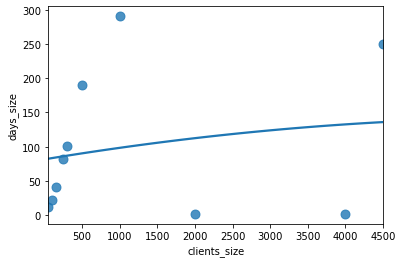

In [9]:
ax = sns.regplot(data=df_max, x="clients_size", y="days_size", scatter_kws={"s": 80}, order=2, ci=None)
#ax = sns.regplot(data=df_min, x="clients_size", y="days_size", scatter_kws={"s": 80}, order=2, ci=None)

## Evolution du temps au moment du succès minimal

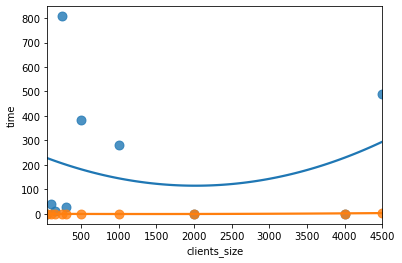

In [10]:
ax = sns.regplot(data=df_max, x="clients_size", y="time", scatter_kws={"s": 80}, order=2, ci=None)
ax = sns.regplot(data=df_min, x="clients_size", y="time", scatter_kws={"s": 80}, order=2, ci=None)

### Averaged minimal time

In [11]:
df_mm = df[(df["success"] == True)]
df_mm = df_mm[["expe", "clients_size", "agg_size", "days_size", "time"]]
df_mm = df_mm.loc[df_mm.groupby(by=["expe", "clients_size", "agg_size"])["days_size"].idxmin()]
df_mm

expe  clients_size  agg_size  \
292231   ./expes/v2_2020-11-23_di_100-prng-3           100         1   
292555   ./expes/v2_2020-11-23_di_100-prng-3           100        11   
297917   ./expes/v2_2020-11-23_di_100-prng-3           100        21   
292513   ./expes/v2_2020-11-23_di_100-prng-3           100        31   
300988   ./expes/v2_2020-11-23_di_100-prng-3           100        41   
...                                      ...           ...       ...   
130625  ./expes/v2_2020-11-29_di_1000-prng-1          1000       851   
132215  ./expes/v2_2020-11-29_di_1000-prng-1          1000       901   
132106  ./expes/v2_2020-11-29_di_1000-prng-1          1000       951   
254665  ./expes/v2_2020-11-29_di_2000-prng-1          2000         1   
185677  ./expes/v2_2020-11-29_di_4000-prng-1          4000         1   

        days_size        time  
292231          1    0.014772  
292555         11    2.840994  
297917         11  124.621999  
292513         21   39.684744  
300988         21  241.579988  
...           ...         ...  
130625        261  459.458553  
132215        201  531.663691  
132106        121   86.027685  
254665          1    0.156589  
185677          1    0.311088  

[215 rows x 5 columns]

In [12]:
df_mm = df_mm.groupby(by=["clients_size", "agg_size"]).agg({"days_size": ["min", "max", "mean"]})
df_mm.columns = df_mm.columns.droplevel(0)
df_mm = df_mm.reset_index()
df_mm

clients_size  agg_size  min  max  mean
0              50         1    1    1     1
1              50        11   11   11    11
2              50        21   11   11    11
3              50        31   11   11    11
4              50        41   11   11    11
..            ...       ...  ...  ...   ...
150          4500        51  251  261   256
151          4500      4461  211  241   226
152          4500      4471  151  161   156
153          4500      4481  111  131   121
154          4500      4491   51  141    96

[155 rows x 5 columns]

In [13]:
# Nombre de jours
fig = px.line_3d(df_mm, x="clients_size", y="agg_size", z="mean", color="clients_size")
fig.show()

In [14]:
#Temps min
fig = px.line_3d(df_mm, x="clients_size", y="agg_size", z="mean", color="agg_size")
fig.show()